# Imports

In [2]:
from dataProcessing import getTextsInDateRange, getPairs, getFullWordset, buildTokenizer
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense

import random
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/ebolton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ebolton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Conda env checking
From article here:
https://towardsdatascience.com/get-your-conda-environment-to-show-in-jupyter-notebooks-the-easy-way-17010b76e874

If conda env is being used correctly, the environment variable below should be `base`.

In [3]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

base


# Constants

In [4]:
CHANNEL_MAPPINGS = {
#     "Daily Wire": "UCroKPvbmaQKGK5tjtQsvaDw",
    "Ben Shapiro": "UCnQC_G5Xsjhp9fEJKuIcrSw",
#     "Daily Wire Plus": "UCaeO5vkdj5xOQHp4UmIN6dw",
#     "Matt Walsh": "UCO01ytfzgXYy4glnPJm4PPQ",
#     "Michael Knowls": "UCr4kgAUTFkGIwlWSodg43QA",
#     "Candace Owens": "UCkY4fdKOFk3Kiq7g5LLKYLw"
}

# Parameters

In [5]:
# channels = ['Ben Shapiro']
channels = list(CHANNEL_MAPPINGS.keys())
start = 2021
stop = 2023

# Get Texts

In [6]:
nltk.download('omw-1.4')
channelIds = [CHANNEL_MAPPINGS[c] for c in channels]
texts = getTextsInDateRange(channelIds, start, stop, cleaned=True)
channelstext = "\n  - ".join(channels)
print([t[:30] for t in texts[:10]])
print()
print(f'Found {len(texts)} videos for channels: \n  - {channelstext}')

[nltk_data] Downloading package omw-1.4 to /Users/ebolton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[['sad', 'left', 'california', 'tell', 'thought', 'one', 'day', 'decision', 'one', 'best', 'decision', 'ever', 'made', 'family', 'know', 'orthodox', 'jewish', 'faith', 'mean', 'move', 'place', 'significant', 'jewish', 'resource', 'inundation', 'homelessness', 'area', 'like', 'kid', 'could'], ['bizarre', 'new', 'world', 'created', 'counter-reality', 'new', 'world', "we've", 'created', 'assigning', 'sex', 'baby', 'dc', 'forcing', 'label', 'mother', "that's", 'case', 'throne', 'mother', 'whole', 'birth', 'certificate', 'thing', 'really', 'really', 'causing', 'lot', 'oh', 'i'], ['end', 'entire', 'group', 'people', 'single', 'woman', 'falling', 'behind', 'married', 'woman', 'engaged', 'social', 'structure', 'important', 'mediating', 'institution', 'human', 'existence', 'marriage', 'ripped', 'away', "they've", 'told', 'longer', 'essential', 'important', 'fact', 'many', 'way', 'institution'], ['idea', 'left', 'everybody', 'right', 'keep', 'saying', "there's", 'election', 'fraud', "that's", 'r

# Build Pairs

In [7]:
pairs = getPairs(texts, window=2)
print(pairs[:10])
print(random.sample(pairs, 100))
print(f'Built {len(pairs)} pairs')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 583/583 [00:00<00:00, 830.42it/s]

[('sad', 'left'), ('sad', 'california'), ('left', 'california'), ('left', 'sad'), ('left', 'tell'), ('california', 'tell'), ('california', 'left'), ('california', 'thought'), ('california', 'sad'), ('tell', 'thought')]
[('unsafe', 'u'), ('price', 'driving'), ('whether', 'next'), ('judge', 'broke'), ('capable', 'extremely'), ('crypto', 'ira'), ('said', 'still'), ('blind', 'feeling'), ('appreciation', 'got'), ("there's", 'look'), ('marriage', 'made'), ('see', 'new'), ('people', 'state'), ('death', 'unborn'), ('raised', 'best'), ('financing', 'star'), ('brzezinski', "here's"), ('blame', 'article'), ('srinivisian', 'solid'), ('jeffrey', 'kind'), ('internet', 'server'), ("we're", 'well'), ('spending', 'showing'), ('knowledge', 'diverse'), ('i', 'frankly'), ('conversation', 'hear'), ('warning', 'strike'), ('nypd', 'swore'), ('uh', 'right'), ('course', 'fell'), ('made', 'ever'), ('american', 'farm'), ('hit', 'one'), ('i', 'gender'), ('created', 'separate'), ('fob', 'instead'), ('people', 'thi

# Get wordset and build tokenizer

In [8]:
wordset = getFullWordset(texts)
word2idx, idx2word = buildTokenizer(wordset)
print(list(wordset)[:20])
print(random.sample(list(wordset), 20))
print(f'Wordset is size: {len(wordset)}')

['', 'remaking', 'clayton', 'daisy', 'sundering', 'fade', 'battling', 'cascade', 'mother', 'squarely', 'non-lethal', 'estrogen', 'forgettable', '2001.', 'celebratory', 'amounted', 'possibly', 'bailing', 'sensor', '081']
["i'ma", "solar's", 'helfer', 'ramp', 'tug', 'applied', 'cali', 'walker', 'amica', 'relativity', 'unencrypted', 'iced', 'civilize', 'greenland', 'doom', 'timeline', 'galloping', 'school', 'segregationist', 'univable']
Wordset is size: 30493


# Convert Pairs to ints

In [10]:
def pairToInts(pair, mapping):
    a, b = pair
    return (mapping[a], mapping[b])

pairset = set(pairs)
intpairs = [pairToInts(p, word2idx) for p in pairs]
print(intpairs[:10])
print(f'Total pairs: {len(intpairs)}')

[(21865, 4200), (27293, 6100), (29741, 16786), (15597, 29298), (12584, 17231), (11166, 29683), (7654, 3391), (1311, 3825), (7055, 12373), (4640, 27077)]
Total pairs: 1775754


# Count pairs for creating weights

In [11]:
pairWeights = {}
for pair in intpairs:
    if pair not in pairWeights:
        pairWeights[pair] = 0
    pairWeights[pair] += 1

# Define generating function for data

In [13]:
npintpairs = np.array(intpairs)
print(npintpairs)
print(npintpairs.shape)

[[21865  4200]
 [27293  6100]
 [29741 16786]
 ...
 [25177 17156]
 [12057 19647]
 [19928 16968]]
(1775754, 2)


In [32]:
from keras.utils import Sequence
class DataGenerator(Sequence):
    def __init__(self, x, y, maxval, batch_size=32):
        '''
        Input should be intger pairs.
        Where x and y are numpy arrays of shape (N,)
        '''
        self.x = x
        self.y = y
        self.max = maxval
        self.batch_size = batch_size
    
    def __len__(self):
        return int(np.floor(len(self.x) / self.batch_size))
    
    def __getitem__(self, index):
        start = index * self.batch_size
        stop = (index + 1) * self.batch_size
        X = self.x[start:stop]
        Y = self.y[start:stop]
        xtf = tf.one_hot(X, self.max)
        ytf = tf.one_hot(Y, self.max)
        return (xtf, ytf)

In [40]:
# xints = npintpairs[:1_000, 0]
# yints = npintpairs[:1_000, 1]
xints = npintpairs[:, 0]
yints = npintpairs[:, 1]
print(xints)
print(xints.shape)
print(yints)
print(yints.shape)

[21865 27293 29741 ... 25177 12057 19928]
(1775754,)
[ 4200  6100 16786 ... 17156 19647 16968]
(1775754,)


In [49]:
dgen = DataGenerator(xints, yints, len(wordset), batch_size=10_000)
print(f'dgen batch size: {dgen.batch_size}')
print(dgen[0])
print(len(dgen))

dgen batch size: 10000
(<tf.Tensor: shape=(10000, 30493), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>, <tf.Tensor: shape=(10000, 30493), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>)
177


# Build and compile NNet

In [50]:
EMBED_SIZE = 64
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [51]:
inp = Input(shape=(len(wordset),))
x = Dense(units=EMBED_SIZE, activation='linear')(inp)
x = Dense(units=len(wordset), activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [52]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30493)]           0         
                                                                 
 dense (Dense)               (None, 64)                1951616   
                                                                 
 dense_1 (Dense)             (None, 30493)             1982045   
                                                                 
Total params: 3,933,661
Trainable params: 3,933,661
Non-trainable params: 0
_________________________________________________________________
None


# Train NNet

In [53]:
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [54]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [56]:
hist = model.fit(
    dgen,
    epochs=2,
)

Epoch 1/2


2022-12-14 00:41:08.188508: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-14 00:41:08.614584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


177/177 [==============================] - 130s 725ms/step - loss: 9.4458
Epoch 2/2
177/177 [==============================] - 113s 638ms/step - loss: 8.6950


# Performance Stats

[9.445782661437988, 8.695038795471191]


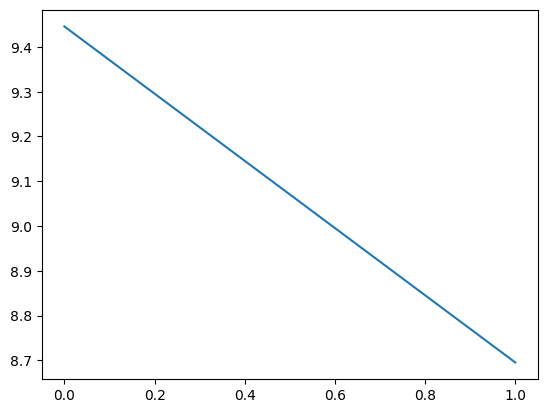

In [58]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
print(hist.history['loss'])
plt.show()

# Build word -> vector mapping

In [59]:
weights = model.get_weights()[0]
print(weights)
print(weights.shape)
word2vec = {}
for word in wordset:
    vec = weights[word2idx[word]]
    word2vec[word] = vec

[[-0.11126867 -0.09427209 -0.09337832 ...  0.09854616 -0.08415956
  -0.08913873]
 [-0.09540839 -0.08412014 -0.10525997 ...  0.09173649 -0.0896446
  -0.08133509]
 [-0.04920753 -0.05208136 -0.0416832  ...  0.0413714  -0.06480107
  -0.05709199]
 ...
 [-0.09679751 -0.07259592 -0.09770514 ...  0.10488999 -0.0676935
  -0.08613074]
 [-0.05164602 -0.04246502 -0.03612399 ...  0.04929443 -0.02840341
  -0.02684001]
 [-0.02409529 -0.01494909 -0.02647165 ...  0.01866089 -0.02766721
  -0.02764549]]
(30493, 64)


# Check pair counts

In [62]:
print(len(pairs))
print(len(set(pairs)))
s = set(pairs)
counts = {}
for p in pairs:
    if p not in counts:
        counts[p] = 1
    else:
        counts[p] = counts[p]+1
sortedpairs = sorted(list(s), key=lambda p: counts[p], reverse=True)
N = 100
print(f'The top {N} occuring pairs')
for i, p in enumerate(sortedpairs[:N], start=1):
    print(i, counts[p], p)

4492998
1775754
The top 100 occuring pairs
1 2799 ('biden', 'joe')
2 2799 ('joe', 'biden')
3 2758 ('state', 'united')
4 2758 ('united', 'state')
5 1592 ('i', 'i')
6 1346 ('i', 'mean')
7 1346 ('mean', 'i')
8 1269 ('think', 'i')
9 1269 ('i', 'think')
10 1171 ('new', 'york')
11 1171 ('york', 'new')
12 1090 ("that's", "that's")
13 948 ('shapiro', 'ben')
14 948 ('ben', 'shapiro')
15 910 ('going', "we're")
16 910 ("we're", 'going')
17 874 ('really', 'really')
18 836 ('donald', 'trump')
19 836 ('trump', 'donald')
20 794 ('like', 'like')
21 750 ('wire', 'daily')
22 750 ('daily', 'wire')
23 712 ('know', 'i')
24 712 ('i', 'know')
25 704 ('like', 'people')
26 704 ('people', 'like')
27 684 ('going', "they're")
28 684 ("they're", 'going')
29 661 ('white', 'house')
30 661 ('house', 'white')
31 649 ('supreme', 'court')
32 649 ('court', 'supreme')
33 615 ('shapiro', 'show')
34 615 ('show', 'shapiro')
35 592 ('people', 'people')
36 591 ('show', 'ben')
37 591 ('ben', 'show')
38 566 ('like', 'i')
39 566 

# Get nearest neighbors

In [64]:
targetWord = 'biden'
v = word2vec[targetWord]
print(v.shape)

dists = {}
for word, vec in word2vec.items():
    d = np.linalg.norm(v - vec)
    dists[word] = d

allwords = list(wordset)
allwords = sorted(allwords, key=lambda w: dists[w])
N = 10
for i in range(N):
    d = dists[allwords[i]]
    print(f"{i:<2} {str(round(d, 3)):<6} {allwords[i]}")

(64,)
0  0.0    biden
1  0.081  collette
2  0.083  hardwick
3  0.084  sequoia
4  0.084  inferno
5  0.085  opportunistic
6  0.085  poultry
7  0.086  ghoul
8  0.086  sirota
9  0.086  elligan


# Export wordset
This is just so you can search for queryable words.

In [ ]:
wordtext = '\n'.join(wordset)
with open('wordset.txt', 'w') as file:
    file.write(wordtext)
    print('WROTE FILE')